In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt


In [3]:
# Load the Titanic dataset
data = pd.read_csv('train.csv')

In [4]:
# Data preprocessing
# Handle missing values, encode categorical variables, and select features.
# For simplicity, let's drop some columns and impute missing values for others.

data = data.drop(['Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Fare'].fillna(data['Fare'].median(), inplace=True)
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

In [5]:
# Split the dataset into features and target
X = data.drop('Survived', axis=1)
y = data['Survived']

In [6]:
#Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
import numpy as np

def standard_scaler(X):
    X_scaler = (X - np.median(X, axis=0)) / np.std(X, axis=0)
    return X_scaler

X_scaler = standard_scaler(X)

In [14]:
# Determine the optimal K value
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_valid)
    accuracy = accuracy_score(y_valid, y_pred)
    accuracies.append(accuracy)

best_k = k_values[accuracies.index(max(accuracies))]

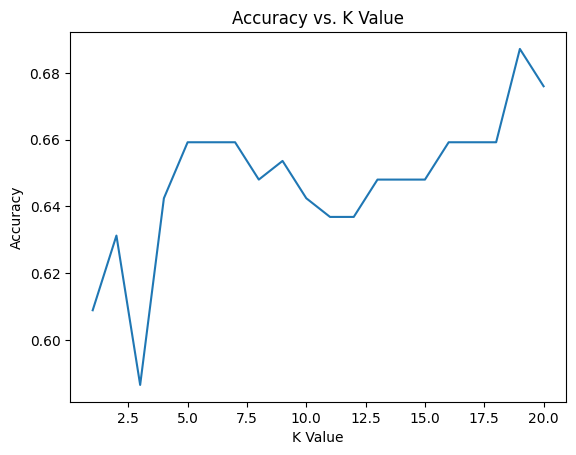

Best K value: 19


In [15]:
# Plot the accuracy for different K values
plt.plot(k_values, accuracies)
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. K Value')
plt.show()

print(f'Best K value: {best_k}')

In [16]:
# Train the final KNN model
final_knn = KNeighborsClassifier(n_neighbors=best_k)
final_knn.fit(X, y)

KNeighborsClassifier(n_neighbors=19)

In [17]:
# Evaluate the model using confusion matrix
y_pred = final_knn.predict(X_valid)
confusion = confusion_matrix(y_valid, y_pred)
print('Confusion Matrix:')
print(confusion)

Confusion Matrix:
[[98  7]
 [50 24]]


In [18]:
# Report the accuracy
accuracy = accuracy_score(y_valid, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.68
